In [1]:
from typing import Callable, Tuple, Union

import numpy as np
import scipy as sp
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.animation as animation

import warnings
warnings.filterwarnings('ignore')

In [2]:
from simplex import NelderMead, constructGIF

# Método de Nelder-Mead

## Ejemplo 1:  $\ \ f(x,y) = x^2 + 2y^2$

In [3]:
maxiter = 70

f  = lambda x: x @ np.array([[1,0],[0,2.]]) @ x
x0 = np.array([0.08, 0.08])

# using scipy
%time res = minimize(fun=f, x0=x0, options={'maxiter': maxiter}, method='Nelder-Mead')
xopt_scipy = res.x

# implement nelder-mead
x = np.array([[5.08, 5.08], [5.23, 5.08], [5.08, 5.23]])
%time xopt, _ = NelderMead(fun=f, x0=x0, maxiter=maxiter, initial_simplex=x)

print('\n')
print(f'Scipy: {xopt_scipy}')
print(f'Implemented: {xopt[0]}')

CPU times: user 3.33 ms, sys: 0 ns, total: 3.33 ms
Wall time: 2.51 ms
CPU times: user 1.55 ms, sys: 173 µs, total: 1.72 ms
Wall time: 1.36 ms


Scipy: [2.32461092e-05 1.56524688e-05]
Implemented: [-2.55128529e-08  3.73981502e-09]


### Animation

In [4]:
# generate iterations
maxiter = 70

#f = lambda x: x @ x
f  = lambda x: x @ np.array([[1,0],[0,2.]]) @ x
x = np.array([[5.08, 5.08], [5.23, 5.08], [5.08, 5.23]])

X = [x]
for _ in range(maxiter):
    x, fx = NelderMead(f, x[0], maxiter=1, initial_simplex=x)
    X.append(x)

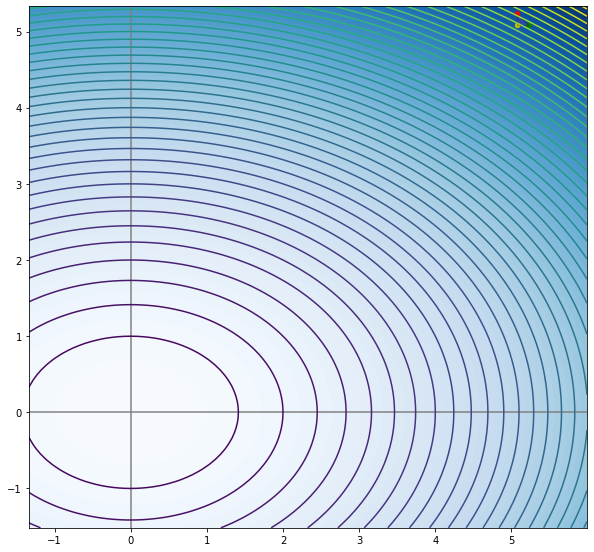

In [5]:
# construct animation
n_grid   = 100
delta    = 0.1
interval = 400

xmax, ymax = np.max(X, axis=(0, 1)) + delta
xmin, ymin = np.min(X, axis=(0, 1)) - delta

# grid
xx, yy = np.meshgrid(np.linspace(xmin, xmax, n_grid), np.linspace(ymin, ymax, n_grid))
vals = np.array([f(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())]).reshape(n_grid, n_grid)

fig = plt.figure(figsize=(10, 10))
ani = animation.FuncAnimation(fig=fig, func=constructGIF, frames=X, fargs=(xmin,xmax,ymin,ymax,xx,yy,vals), interval=interval)
ani.save("nelder-mead-Quadratic.gif", writer = 'imagemagick')

## Ejemplo 2:  $\ \ $ Rosembrock

In [6]:
maxiter = 200

f  = lambda x: 100.*(x[1] - x[0]**2)**2 + (x[0] - 1.)**2
x0 = np.array([-1.08, 1.08])

# scipy
%time res = minimize(fun=f, x0=x0, options={'maxiter': maxiter}, method='Nelder-Mead')
xopt_scipy = res.x

# implemented
x = np.array([[-1.08, 1.08], [-1.13, 1.08], [-1.08, 1.13]])
%time xopt, _ = NelderMead(fun=f, x0=x0, maxiter=maxiter, initial_simplex=x)

print('\n')
print(f'Scipy: {xopt_scipy}')
print(f'Implemented: {xopt[0]}')

CPU times: user 4.03 ms, sys: 59 µs, total: 4.09 ms
Wall time: 2.86 ms
CPU times: user 5.89 ms, sys: 0 ns, total: 5.89 ms
Wall time: 4.24 ms


Scipy: [0.99998902 0.99997951]
Implemented: [1. 1.]


## Animation

In [7]:
# generate iterations
maxiter = 200

f = lambda x: 100.*(x[1] - x[0]**2)**2 + (x[0] - 1.)**2
#x = np.array([[-1.08, 1.08], [-1.13, 1.08], [-1.08, 1.13]])
x = np.array([[-0.58, 1.58], [-0.63, 1.58], [-0.58, 1.63]])

X = [x]
for _ in range(maxiter):
    x, fx = NelderMead(f, x[0], maxiter=1, initial_simplex=x)
    X.append(x)

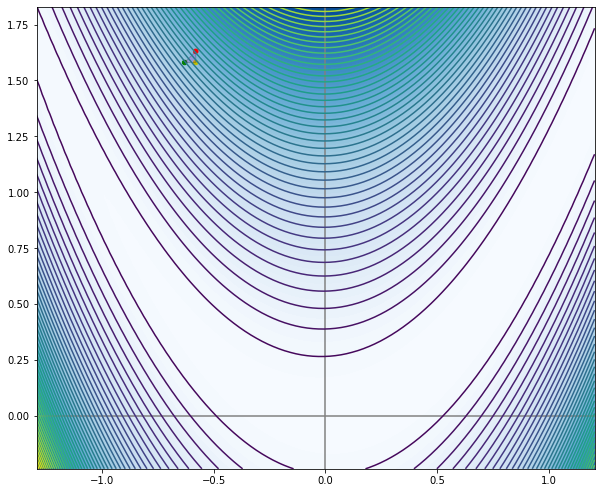

In [8]:
# construct animation
n_grid   = 100
delta    = 0.2
interval = 400

xmax, ymax = np.max(X, axis=(0, 1)) + delta
xmin, ymin = np.min(X, axis=(0, 1)) - delta

# function values of lattice points
xx, yy = np.meshgrid(np.linspace(xmin, xmax, n_grid), np.linspace(ymin, ymax, n_grid))
vals = np.array([f(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())]).reshape(n_grid, n_grid)

fig = plt.figure(figsize=(10, 10))
ani = animation.FuncAnimation(fig=fig, func=constructGIF, frames=X, fargs=(xmin,xmax,ymin,ymax,xx,yy,vals), interval=interval)
ani.save("nelder-mead-Rosembrock.gif", writer = 'imagemagick')

## Ejemplo 3:  $\ \ $ Schwebel $\ f(x,y) = |x|+|y|$

In [9]:
maxiter = 70

f  = lambda x: np.abs(x[0]) + np.abs(x[1])
x0 = np.array([9.08, 5.08])

# scipy
%time res = minimize(fun=f, x0=x0, options={'maxiter': maxiter}, method='Nelder-Mead')
xopt_scipy = res.x

# implemented
x = np.array([[9.08, 5.08], [9.23, 5.08], [9.08, 5.23]])
%time xopt, _ = NelderMead(fun=f, x0=x0, maxiter=maxiter, initial_simplex=x)

print('\n')
print(f'Scipy: {xopt_scipy}')
print(f'Implemented: {xopt[0]}')

CPU times: user 2.89 ms, sys: 15 µs, total: 2.9 ms
Wall time: 2.16 ms
CPU times: user 0 ns, sys: 1.95 ms, total: 1.95 ms
Wall time: 1.44 ms


Scipy: [2.01125555e-05 2.36178908e-05]
Implemented: [-2.81703094e-08  3.50064516e-07]


## Animation

In [10]:
#generate iterations
maxiter = 70

f = lambda x: np.abs(x[0]) + np.abs(x[1])
x = np.array([[9.08, 5.08], [9.23, 5.08], [9.08, 5.23]])

X = [x]
for _ in range(maxiter):
    x, fx = NelderMead(f, x[0], maxiter=1, initial_simplex=x)
    X.append(x)

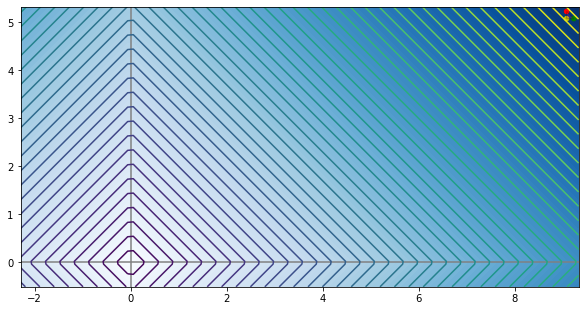

In [11]:
# construct animation
n_grid   = 100
delta    = 0.1
interval = 400

xmax, ymax = np.max(X, axis=(0, 1)) + delta
xmin, ymin = np.min(X, axis=(0, 1)) - delta

# function values of lattice points
xx, yy = np.meshgrid(np.linspace(xmin, xmax, n_grid), np.linspace(ymin, ymax, n_grid))
vals = np.array([f(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())]).reshape(n_grid, n_grid)

fig = plt.figure(figsize=(10, 10))
ani = animation.FuncAnimation(fig=fig, func=constructGIF, frames=X, fargs=(xmin,xmax,ymin,ymax,xx,yy,vals), interval=interval)
ani.save("nelder-mead-Schwebel.gif", writer = 'imagemagick')

## Ejemplo 4:  $\ \ $ Schwebel $\ f(x,y) = max \{|x|, |y|\}$

In [12]:
maxiter = 80

f  = lambda x: max(np.abs(x[0]), np.abs(x[1]))
x0 = np.array([9.08, 5.08])

# scipy
%time res = minimize(fun=f, x0=x0, options={'maxiter': maxiter}, method='Nelder-Mead')
xopt_scipy = res.x

# implemented
x = np.array([[9.08, 5.08], [9.23, 5.08], [9.08, 5.23]])
%time xopt, _ = NelderMead(fun=f, x0=x0, maxiter=maxiter, initial_simplex=x)

print('\n')
print(f'Scipy: {xopt_scipy}')
print(f'Implemented: {xopt[0]}')

CPU times: user 2.84 ms, sys: 0 ns, total: 2.84 ms
Wall time: 2.34 ms
CPU times: user 2.13 ms, sys: 7 µs, total: 2.14 ms
Wall time: 1.73 ms


Scipy: [-1.26491154e-05  2.68237903e-05]
Implemented: [-3.68577901e-07  1.05349890e-06]


## Animation

In [13]:
#generate iterations
maxiter = 80

f  = lambda x: max(np.abs(x[0]), np.abs(x[1]))
x = np.array([[9.08, 5.08], [9.23, 5.08], [9.08, 5.23]])

X = [x]
for _ in range(maxiter):
    x, fx = NelderMead(f, x[0], maxiter=1, initial_simplex=x)
    X.append(x)

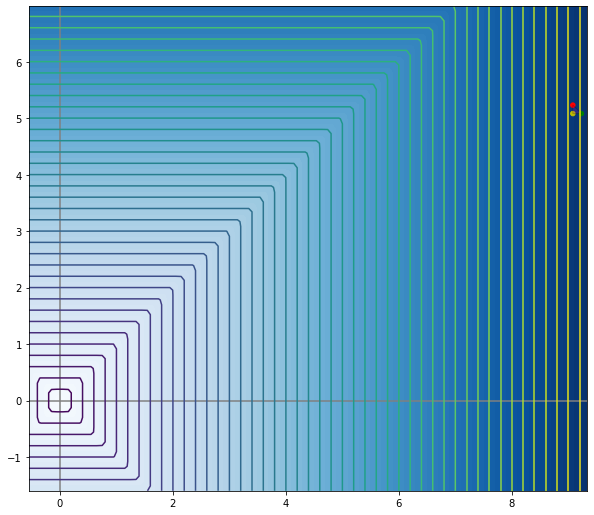

In [14]:
# construct animation
n_grid   = 100
delta    = 0.1
interval = 400

xmax, ymax = np.max(X, axis=(0, 1)) + delta
xmin, ymin = np.min(X, axis=(0, 1)) - delta

# function values of lattice points
xx, yy = np.meshgrid(np.linspace(xmin, xmax, n_grid), np.linspace(ymin, ymax, n_grid))
vals = np.array([f(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())]).reshape(n_grid, n_grid)

fig = plt.figure(figsize=(10, 10))
ani = animation.FuncAnimation(fig=fig, func=constructGIF, frames=X, fargs=(xmin,xmax,ymin,ymax,xx,yy,vals), interval=interval)
ani.save("nelder-mead-Max.gif", writer = 'imagemagick')

## Ejemplo 5:  $\ \ $ Griewank

In [ ]:
maxiter = 200

f  = lambda x: (x @ x)/4e3 - np.cos(x[0])*np.cos(x[1]/np.sqrt(2.)) + 1.
x0 = np.array([5.08, 5.08])

# scipy
%time res = minimize(fun=f, x0=x0, options={'maxiter': maxiter}, method='Nelder-Mead')
xopt_scipy = res.x

# implemented
x = np.array([[5.08, 5.08], [5.23, 5.08], [5.08, 5.23]])
%time xopt, _ = NelderMead(fun=f, x0=x0, maxiter=maxiter, initial_simplex=x)

print('\n')
print(f'Scipy: {xopt_scipy}')
print(f'Implemented: {xopt[0]}')

## Animation

In [ ]:
#generate iterations
maxiter = 200

fun = lambda x: (x @ x)/4e3 - np.cos(x[0])*np.cos(x[1]/np.sqrt(2.)) + 1.

x = np.array([[5.08, 5.08], [5.23, 5.08], [5.08, 5.23]])
#x = np.array([[5.08, 5.08], [-5.23, -5.08], [-5.08, -5.23]])

X = [x]
for _ in range(maxiter):
    x, fx = NelderMead(f, x[0], maxiter=1, initial_simplex=x)
    X.append(x)

In [ ]:
# construct animation
n_grid   = 100
delta    = 0.2
interval = 400

xmax, ymax = np.max(X, axis=(0, 1)) + delta
xmin, ymin = np.min(X, axis=(0, 1)) - delta

# function values of lattice points
xx, yy = np.meshgrid(np.linspace(xmin, xmax, n_grid), np.linspace(ymin, ymax, n_grid))
vals = np.array([f(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())]).reshape(n_grid, n_grid)

fig = plt.figure(figsize=(10, 10))
ani = animation.FuncAnimation(fig=fig, func=constructGIF, frames=X, fargs=(xmin,xmax,ymin,ymax,xx,yy,vals), interval=interval)
ani.save("nelder-mead-Griewank.gif", writer = 'imagemagick')

## Other Animation

In [ ]:
#generate iterations
maxiter = 60

fun = lambda x: (x @ x)/4e3 - np.cos(x[0])*np.cos(x[1]/np.sqrt(2.)) + 1.

x = np.array([[4.08, 4.08], [-4.08, 4.08], [-4.08, -4.1]])

X = [x]
for _ in range(maxiter):
    x, fx = NelderMead(f, x[0], maxiter=1, initial_simplex=x)
    X.append(x)

In [ ]:
# construct animation
n_grid   = 100
delta    = 0.2
interval = 400

xmax, ymax = np.max(X, axis=(0, 1)) + delta
xmin, ymin = np.min(X, axis=(0, 1)) - delta

# function values of lattice points
xx, yy = np.meshgrid(np.linspace(xmin, xmax, n_grid), np.linspace(ymin, ymax, n_grid))
vals = np.array([f(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())]).reshape(n_grid, n_grid)

fig = plt.figure(figsize=(10, 10))
ani = animation.FuncAnimation(fig=fig, func=constructGIF, frames=X, fargs=(xmin,xmax,ymin,ymax,xx,yy,vals), interval=interval)
ani.save("nelder-mead-Griewank2.gif", writer = 'imagemagick')